# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting continous values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this lab, you'll review precision, recall, accuracy, and F1 score in order to evaluate our logistic regression models.


## Objectives 

In this lab you will: 

- Implement evaluation metrics from scratch using Python 



## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


At times, it may be best to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## Split the data into training and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Split the data first into `X` and `y`, and then into training and test sets. Assign 25% to the test set and set the `random_state` to 0. 

In [2]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into X and y
y = df.target
X = df.drop('target', axis=1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Build a vanilla logistic regression model

- Import and instantiate `LogisticRegression` 
- Make sure you do not use an intercept term and use the `'liblinear'` solver 
- Fit the model to training data

In [3]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Write a function to calculate the precision

In [4]:
def conf_mat(y, y_hat):
    d_conf_mat = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0} # so key appear in proper order
    for idx, lbl in enumerate(y):
        if lbl == 1:
            if lbl == y_hat[idx]:
                d_conf_mat['TP'] += 1
            else: # since y_pred does not match label and label is positive, we have a false negative
                d_conf_mat['FN'] += 1
        else: # lbl == 0 (negative)
            if lbl == y_hat[idx]:
                d_conf_mat['TN'] += 1
            else: # since y_pred does not match label and label is negative, we have a false positive
                d_conf_mat['FP'] += 1
    return d_conf_mat

def precision(y, y_hat, cm = None):
    cm = cm if cm is not None else conf_mat(y, y_hat)
    return cm['TP']/sum(y_hat)

## Write a function to calculate the recall

In [5]:
def recall(y, y_hat, cm = None):
    cm = cm if cm is not None else conf_mat(y, y_hat)
    return cm['TP']/sum(y)

## Write a function to calculate the accuracy

In [6]:
def accuracy(y, y_hat, cm = None):
    cm = cm if cm is not None else conf_mat(y, y_hat)
    return (cm['TP'] + cm['TN'])/len(y)

## Write a function to calculate the F1 score

In [7]:
def f1_score(y, y_hat, cm = None):
    p = precision(y, y_hat, cm)
    r = recall(y, y_hat, cm)
    return 2*p*r/(p+r)

## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [8]:
# Your code here
from IPython.core.display import HTML, Markdown

def compute_logit_metrics(X, y, model=None, title=None):
    model = model if model is not None else LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear').fit(X, y)
    y_hat = model_log.predict(X)
    cm = conf_mat(y, y_hat)
    display(HTML(f"<h3>Confusion Matrix{(' (' + title + ')') if title is not None else ''}:</h3>{cm}<p>"))
    precision_ = precision(y, y_hat, cm)
    recall_ = recall(y, y_hat, cm)
    accuracy_ = accuracy(y, y_hat, cm)
    f1 = f1_score(y, y_hat, cm)
    display(Markdown(f"""\n$
        precision{('_{' + title + '}') if title is not None else ''}={round(precision_,4)}, 
        recall{('_{' + title + '}') if title is not None else ''}={round(recall_,4)}, 
        accuracy{('_{' + title + '}') if title is not None else ''}={round(accuracy_,4)}, 
        F1{('_{' + title + '}') if title is not None else ''}={round(f1,4)}$
    """))
    return (precision_, recall_, f1)

In [9]:
y_hat_train = model_log.predict(X_train)
train_metrics = compute_logit_metrics(X_train, y_train, model_log, title='train')

display(HTML("<p><br>"))
y_hat_test = model_log.predict(X_test)
test_metrics = compute_logit_metrics(X_test, y_test, model_log, title='test')


$
        precision_{train}=0.8397, 
        recall_{train}=0.9016, 
        accuracy_{train}=0.8546, 
        F1_{train}=0.8696$
    


$
        precision_{test}=0.8125, 
        recall_{test}=0.907, 
        accuracy_{test}=0.8289, 
        F1_{test}=0.8571$
    

Great job! Now it's time to check your work with `sklearn`. 

## Calculate metrics with `sklearn`

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions above with the `sklearn` functions. Calculate these values for both your train and test set. 

In [10]:
# Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

sklearn_train_metrics = (
    precision_score(y_train, y_hat_train), 
    recall_score(y_train, y_hat_train), 
    accuracy_score(y_train, y_hat_train), 
    f1_score(y_train, y_hat_train), 
)
title = 'train'
display(Markdown(f"""\n$
    precision{('_{' + title + '}') if title is not None else ''}={round(sklearn_train_metrics[0],4)}, 
    recall{('_{' + title + '}') if title is not None else ''}={round(sklearn_train_metrics[1],4)}, 
    accuracy{('_{' + title + '}') if title is not None else ''}={round(sklearn_train_metrics[2],4)}, 
    F1{('_{' + title + '}') if title is not None else ''}={round(sklearn_train_metrics[3],4)}$
"""))

sklearn_test_metrics = (
    precision_score(y_test, y_hat_test), 
    recall_score(y_test, y_hat_test), 
    accuracy_score(y_test, y_hat_test), 
    f1_score(y_test, y_hat_test), 
)
title = 'test'
display(Markdown(f"""\n$
    precision{('_{' + title + '}') if title is not None else ''}={round(sklearn_test_metrics[0],4)}, 
    recall{('_{' + title + '}') if title is not None else ''}={round(sklearn_test_metrics[1],4)}, 
    accuracy{('_{' + title + '}') if title is not None else ''}={round(sklearn_test_metrics[2],4)}, 
    F1{('_{' + title + '}') if title is not None else ''}={round(sklearn_test_metrics[3],4)}$
"""))


$
    precision_{train}=0.8397, 
    recall_{train}=0.9016, 
    accuracy_{train}=0.8546, 
    F1_{train}=0.8696$



$
    precision_{test}=0.8125, 
    recall_{test}=0.907, 
    accuracy_{test}=0.8289, 
    F1_{test}=0.8571$


Nicely done! Did the results from `sklearn` match that of your own? 

### THEY SURE DID!

## Compare precision, recall, accuracy, and F1 score for train vs test sets

Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def plot_compare_logit_metric(train_metric_vals, test_metrics_vals, range_, metric_name, plot_type=0):
    fig = plt.figure(figsize=(8,6))
    f_plot = plt.plot if plot_type == 1 else plt.scatter
    f_plot(range_, train_metric_vals, label="$" + metric_name + "_{train}$")
    f_plot(range_, test_metrics_vals, label="$" + metric_name + "_{test}$")
    plt.xlabel("test size (%)")
    plt.ylabel(metric_name)
    plt.legend()
    plt.title(f"{metric_name.title()} test-train comparison")
    fig.tight_layout()
    plt.show()

In [13]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train) 
    
    # Your code here
    # train
    sklearn_train_metrics = (
        precision_score(y_train, y_hat_train), 
        recall_score(y_train, y_hat_train), 
        accuracy_score(y_train, y_hat_train), 
        f1_score(y_train, y_hat_train), 
    )
    training_precision.append(sklearn_train_metrics[0])
    training_recall.append(sklearn_train_metrics[1])
    training_accuracy.append(sklearn_train_metrics[2])
    training_f1.append(sklearn_train_metrics[3])

    # test
    sklearn_test_metrics = (
        precision_score(y_test, y_hat_test), 
        recall_score(y_test, y_hat_test), 
        accuracy_score(y_test, y_hat_test), 
        f1_score(y_test, y_hat_test), 
    )
    testing_precision.append(sklearn_test_metrics[0])
    testing_recall.append(sklearn_test_metrics[1])
    testing_accuracy.append(sklearn_test_metrics[2])
    testing_f1.append(sklearn_test_metrics[3])

Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one. 

We already created the scatter plot for precision: 

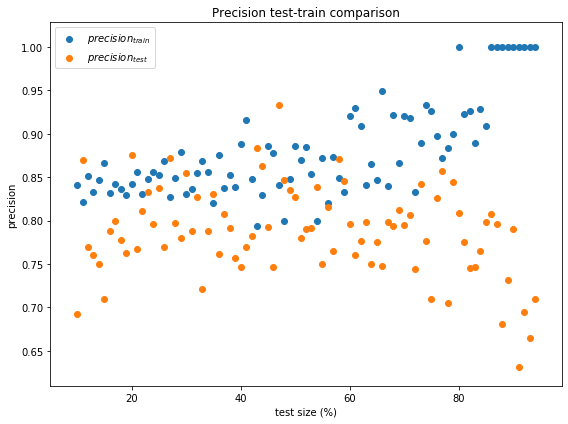

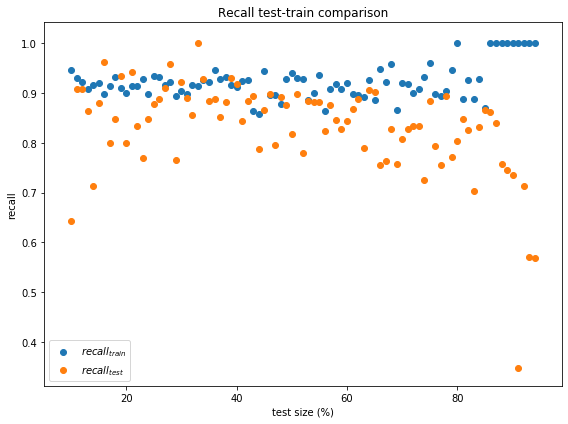

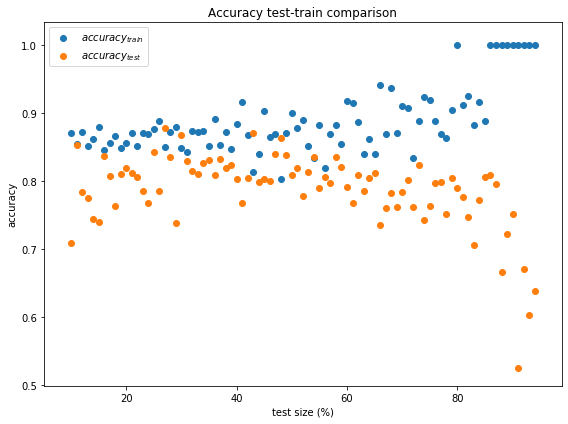

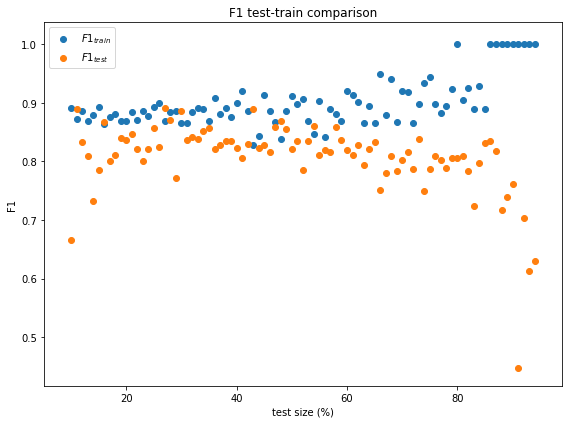

In [14]:
plot_compare_logit_metric(training_precision, testing_precision, range(10,95), "precision")
plot_compare_logit_metric(training_recall, testing_recall, range(10,95), "recall")
plot_compare_logit_metric(training_accuracy, testing_accuracy, range(10,95), "accuracy")
plot_compare_logit_metric(training_f1, testing_f1, range(10,95), "F1")

## Summary

Nice! In this lab, you calculated evaluation metrics for classification algorithms from scratch in Python. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.